In [1]:
import pandas as pd
import numpy as np

## Problem 1

In [55]:
df=pd.read_csv('dataset_1.csv',index_col=False)
df.drop(['Id'],axis=1,inplace=True)
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,target
0,5.1,3.5,1.4,0.2,Class_1
1,4.9,3.0,1.4,0.2,Class_1
2,4.7,3.2,1.3,0.2,Class_1
3,4.6,3.1,1.5,0.2,Class_1
4,5.0,3.6,1.4,0.2,Class_1


Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
target       0
dtype: int64


<AxesSubplot:>

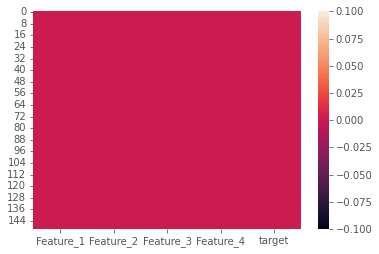

In [39]:
print(df.isna().sum())

import seaborn as sns
sns.heatmap(df.isnull())

### EDA

<AxesSubplot:title={'center':'Feature_1'}>

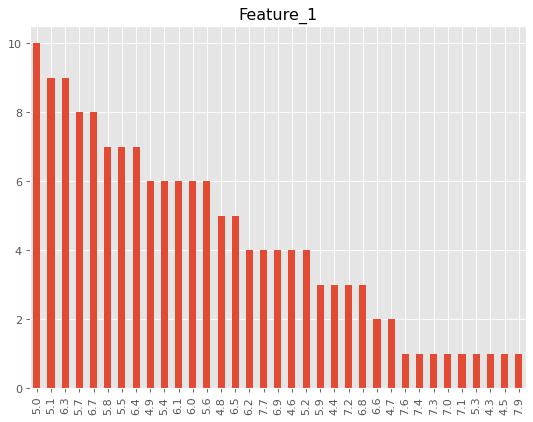

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df['Feature_1'].value_counts().plot.bar(title='Feature_1')

<AxesSubplot:title={'center':'Feature_2'}>

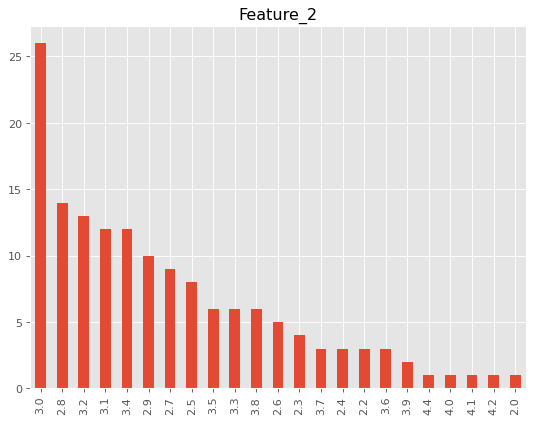

In [41]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df['Feature_2'].value_counts().plot.bar(title='Feature_2')

<AxesSubplot:title={'center':'Feature_3'}>

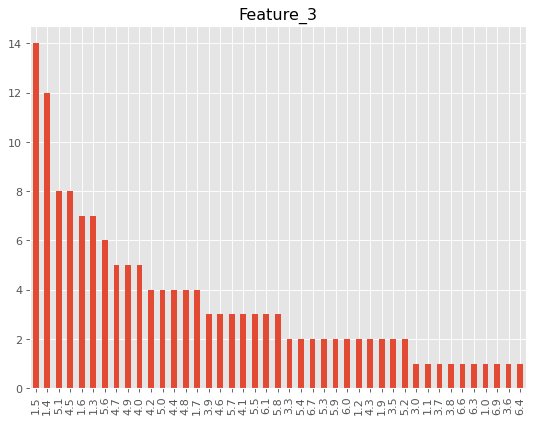

In [42]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df['Feature_3'].value_counts().plot.bar(title='Feature_3')

<AxesSubplot:title={'center':'Feature_4'}>

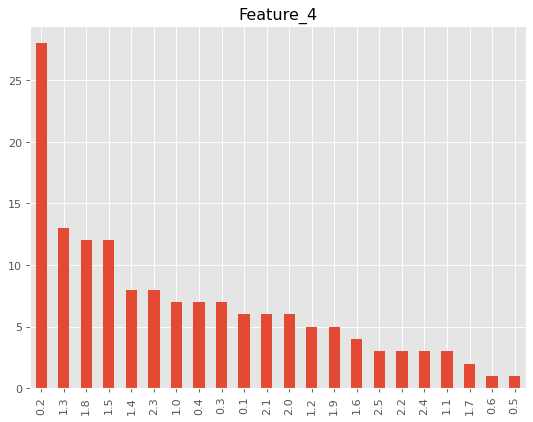

In [43]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df['Feature_4'].value_counts().plot.bar(title='Feature_4')

<AxesSubplot:title={'center':'Target'}>

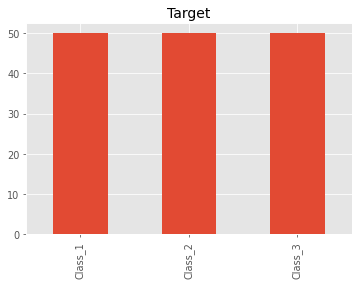

In [44]:
figure(figsize=(6, 4), dpi=70)
plt.style.use('ggplot')
df['target'].value_counts().plot.bar(title='Target')

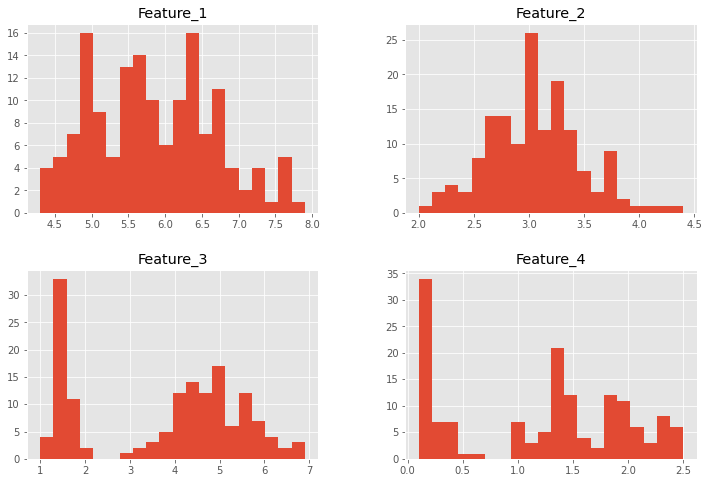

In [45]:
df.hist(figsize=(12,8),bins=20)
plt.show()

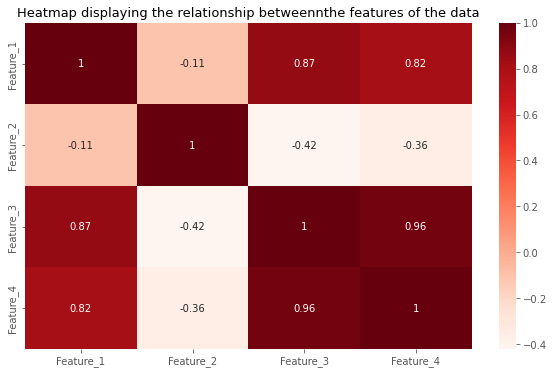

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

### Data Encoding

In [49]:
X=df.drop(['target'],axis=1)
y=df['target']

In [50]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

### Splitting the data

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Use of ML models

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf=RandomForestClassifier(n_estimators=80,max_depth=4,max_features=2)

In [95]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=2, n_estimators=80)

In [96]:
rf_pred=rf.predict(X_test)
rf_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test,rf_pred)
print('Confusion matrix : \n',matrix)


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,rf_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [113]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.933 (0.062)


In [117]:
from sklearn.metrics import accuracy_score
print("Model Accuracy:- ",accuracy_score(y_test,rf_pred))

Model Accuracy:-  1.0


#### By using RandomForest we got 1 as accuracy and using cv on same model we got 0.933

In [106]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
result.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [127]:
print(f'Training Accuracy: {rf.score(X_train,y_train)*100}%')
print(f'Testing Accuracy: {rf.score(X_test,y_test)*100}%')

Training Accuracy: 98.33333333333333%
Testing Accuracy: 100.0%


### DT

In [128]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

In [129]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [130]:
dt_pred=dt.predict(X_test)
dt_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test,dt_pred)
print('Confusion matrix : \n',matrix)


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,dt_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [568]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.917 (0.065)


In [133]:
from sklearn.metrics import accuracy_score
print("Model Accuracy:- ",accuracy_score(y_test,dt_pred))

Model Accuracy:-  1.0


#### By using DecisionTree we got 1 as accuracy and using cv on the same model we got 0.917

In [134]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
result.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [135]:
print(f'Training Accuracy: {dt.score(X_train,y_train)*100}%')
print(f'Testing Accuracy: {dt.score(X_test,y_test)*100}%')

Training Accuracy: 100.0%
Testing Accuracy: 100.0%


## Problem 2

In [136]:
df1=pd.read_csv('dataset_2.csv')
df1.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,1,6.1,4,4.4,4.2,0,5.5,Class_1
1,2,5.9,1,4.4,4.2,3,5.0,Class_1
2,3,5.7,4,4.3,4.2,2,5.2,Class_1
3,4,5.6,2,4.5,4.2,0,5.1,Class_1
4,5,6.0,5,4.4,4.2,1,5.6,Class_1


In [138]:
df1.drop(['Id'],axis=1,inplace=True)
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,6.1,4,4.4,4.2,0,5.5,Class_1
1,5.9,1,4.4,4.2,3,5.0,Class_1
2,5.7,4,4.3,4.2,2,5.2,Class_1
3,5.6,2,4.5,4.2,0,5.1,Class_1
4,6.0,5,4.4,4.2,1,5.6,Class_1


In [139]:
df1.isna().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Target       0
dtype: int64

<AxesSubplot:>

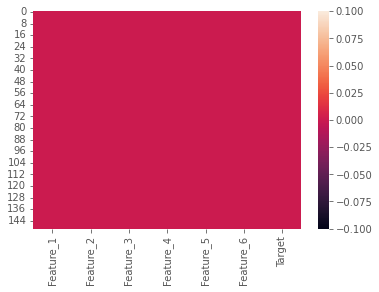

In [140]:
sns.heatmap(df1.isna())

### EDA

<AxesSubplot:title={'center':'Feature_1'}>

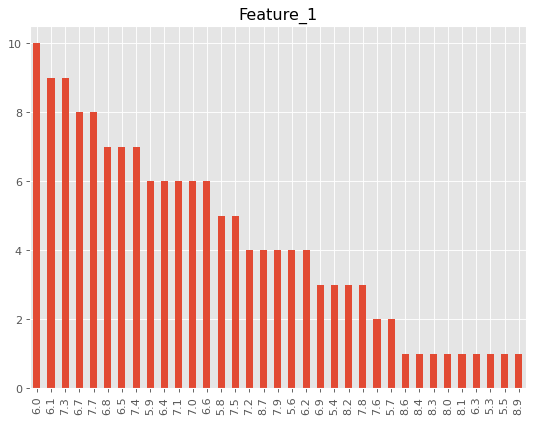

In [141]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df1['Feature_1'].value_counts().plot.bar(title='Feature_1')

<AxesSubplot:title={'center':'Feature_2'}>

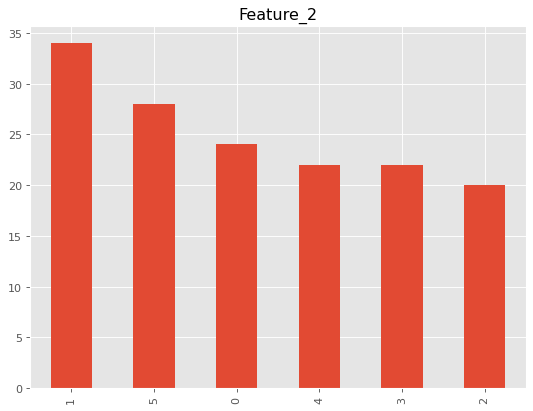

In [142]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df1['Feature_2'].value_counts().plot.bar(title='Feature_2')

<AxesSubplot:title={'center':'Feature_3'}>

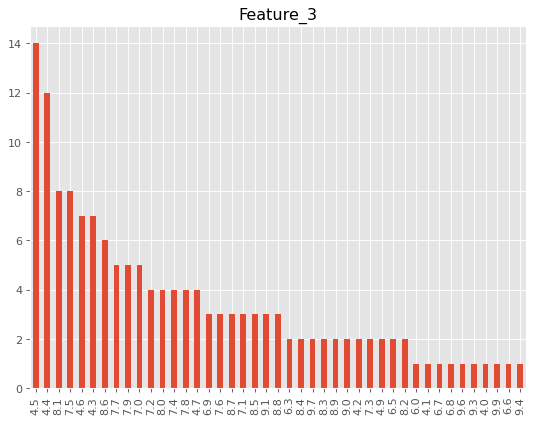

In [143]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df1['Feature_3'].value_counts().plot.bar(title='Feature_3')

<AxesSubplot:title={'center':'Feature_4'}>

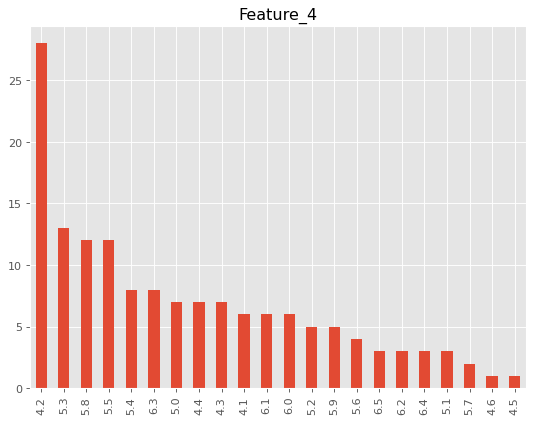

In [144]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df1['Feature_4'].value_counts().plot.bar(title='Feature_4')

<AxesSubplot:title={'center':'Feature_5'}>

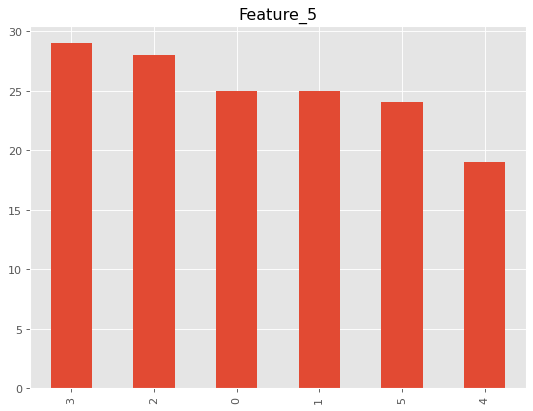

In [146]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df1['Feature_5'].value_counts().plot.bar(title='Feature_5')

<AxesSubplot:title={'center':'Feature_6'}>

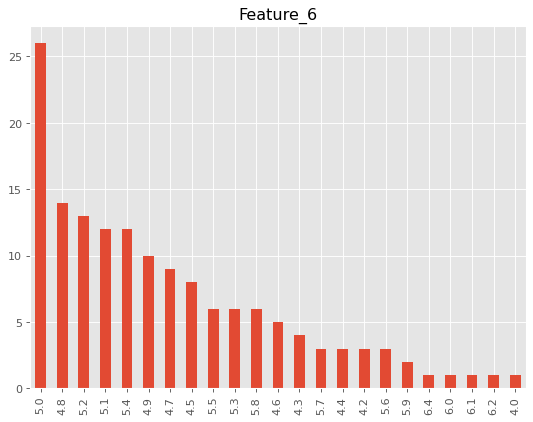

In [147]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
df1['Feature_6'].value_counts().plot.bar(title='Feature_6')

<AxesSubplot:title={'center':'Target'}>

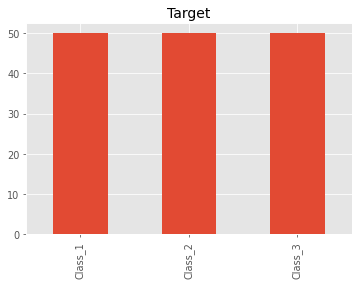

In [149]:
figure(figsize=(6, 4), dpi=70)
plt.style.use('ggplot')
df1['Target'].value_counts().plot.bar(title='Target')

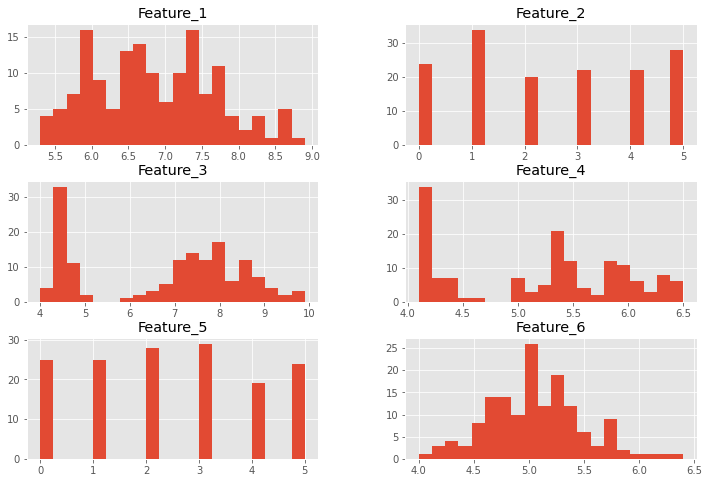

In [150]:
df1.hist(figsize=(12,8),bins=20)
plt.show()

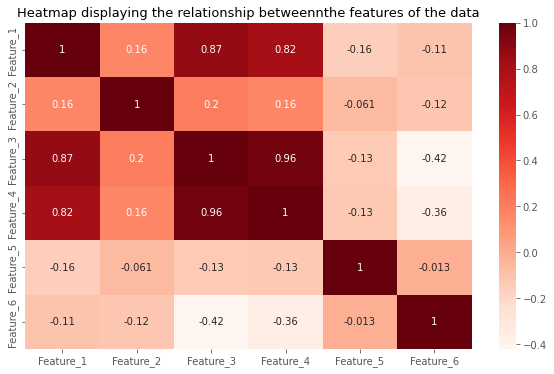

In [151]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

### Data Encoding

In [228]:
X=df1.drop(['Target'],axis=1)
y=df1['Target']

In [229]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

### Splitting the data

In [230]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Use of ML models
- KNN

In [231]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [232]:
y_npred=neigh.predict(X_test)
y_npred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [233]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test,y_npred)
print('Confusion matrix : \n',matrix)


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_npred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [234]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(neigh, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.875 (0.042)


In [235]:
from sklearn.metrics import accuracy_score
print("Model Accuracy:- ",accuracy_score(y_test,dt_pred))

Model Accuracy:-  1.0


#### By using KNN we got 1 as accuracy and by using cv we got 0.958

In [236]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
result.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [237]:
print(f'Training Accuracy: {neigh.score(X_train,y_train)*100}%')
print(f'Testing Accuracy: {neigh.score(X_test,y_test)*100}%')

Training Accuracy: 93.33333333333333%
Testing Accuracy: 96.66666666666667%


## Problem 3

In [343]:
df2=pd.read_csv('dataset_3.csv')
df2.head()

,Title,Abstract,First Claim,Target
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning


In [541]:
##using Abstract as x and Target as y
txt=df2['Abstract']
label=df2['Target']

In [542]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(txt)

In [543]:
tfidf = TfidfVectorizer(max_features = 4000) 
tfidf.fit(corpus)
tfidf_features = tfidf.fit_transform(corpus)

In [544]:
tfidf_features.shape

(200, 2682)

In [545]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_fscore_support
# Converting the labels from strings to binary
le = LabelEncoder()
le.fit(label)
label = le.transform(label)

In [546]:
# Taking 70/30 train test split
train_percent = 0.8
train_cutoff = int(np.floor(train_percent*len(txt) ) )

In [547]:
tfidf_model = LinearSVC()
tfidf_model.fit(tfidf_features[0 : train_cutoff], 
                  label[0 : train_cutoff])
tfidf_prediction = tfidf_model.predict(
                  tfidf_features[train_cutoff + 1 : len(txt)])

In [548]:
results = pd.DataFrame(index = ['TF-IDF'], 
          columns = ['Precision', 'Recall', 'F1 score', 'support']
          )

results.loc['TF-IDF'] = precision_recall_fscore_support(
          label[train_cutoff + 1 : len(txt)], 
          tfidf_prediction, 
          average = 'macro'
          )

c:\users\sayed\ml_path\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [549]:
results

,Precision,Recall,F1 score,support
TF-IDF,0.25,0.128205,0.169492,None


### Text Analysis

In [556]:
from pathlib import Path  
##Text analysis on Title column
text_titles = [Path(txt).stem for txt in df2.Title]

In [560]:
tfidf_df2 = pd.DataFrame(tfidf_features.toarray(), index=text_titles, columns=tfidf.get_feature_names())

c:\users\sayed\ml_path\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [561]:
tfidf_df2.features

Geophysical deep learning                                                                    0.000000
Deep learning for algorithm portfolios                                                       0.110355
Modular deep learning model                                                                  0.000000
Deep learning processing of video                                                            0.000000
System and method for deep learning and wireless network optimization using deep learning    0.000000
                                                                                               ...   
PROCESS FOR PRODUCING BRANCHED POLYMER AND POLYMER                                           0.000000
Polymer electrolyte and polymer lithium battery                                              0.000000
Polymers, polymer compositions, and method of preparation                                    0.000000
Polymerization process for olefin-based polymers                                  

In [562]:
tfidf_df2.loc['00_Word Frequency'] = (tfidf_df2 > 0).sum()

In [563]:
tfidf_slice = tfidf_df2[['deep','learning']]
tfidf_slice.sort_index().round(decimals=2)

,deep,learning
00_Word Frequency,28.00,28.00
Activation layers for deep learning networks,0.06,0.06
Active view planning by deep learning,0.00,0.00
Amplification and detection of mycobacterial DNA K nucleic acids,0.00,0.00
Approximate synchronization for parallel deep learning,0.03,0.07
...,...,...
Tomographic reconstruction based on deep learning,0.06,0.11
Video frame synthesis with deep learning,0.00,0.00
cDNA library for nucleic acid sequencing,0.00,0.00
cDNA-derived nucleic acids encoding red-shifted channelrhodopsins,0.00,0.00


In [564]:
tfidf_df = tfidf_df2.drop('00_Word Frequency', errors='ignore')

In [565]:
tfidf_df=tfidf_df.stack().reset_index()

In [566]:
tfidf_df

,level_0,level_1,0
0,Geophysical deep learning,000,0.0
1,Geophysical deep learning,0â,0.0
2,Geophysical deep learning,10,0.0
3,Geophysical deep learning,100,0.0
4,Geophysical deep learning,1000,0.0
...,...,...,...
536395,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",î¼m,0.0
536396,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",œfecnnâ,0.0
536397,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",œledsâ,0.0
536398,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",ƒwhich,0.0


In [468]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'data','level_1': 'term'})
tfidf_df

,data,term,tfidf
0,Geophysical deep learning,000,0.0
1,Geophysical deep learning,02,0.0
2,Geophysical deep learning,05,0.0
3,Geophysical deep learning,0â,0.0
4,Geophysical deep learning,10,0.0
...,...,...,...
585195,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",œpâ,0.0
585196,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",ƒformula,0.0
585197,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",ƒin,0.0
585198,"POLYMER, PROCESSES FOR PRODUCING POLYMER, AND ...",ƒwherein,0.0


In [469]:
top_tfidf = tfidf_df.sort_values(by=['data','tfidf'], ascending=[True,False]).groupby(['data']).head(10)

### Here it returns all the data consisting of term learning

In [475]:
top_tfidf[top_tfidf['data'].str.contains('learning')]

,data,term,tfidf
78537,Activation layers for deep learning networks,slope,0.343668
76747,Activation layers for deep learning networks,convolutional,0.278904
78214,Activation layers for deep learning networks,query,0.257751
78737,Activation layers for deep learning networks,the,0.221103
76814,Activation layers for deep learning networks,data,0.203666
...,...,...,...
42040,Video frame synthesis with deep learning,flow,0.223422
42415,Video frame synthesis with deep learning,learned,0.223422
43585,Video frame synthesis with deep learning,synthesized,0.223422
42605,Video frame synthesis with deep learning,more,0.215056


## Problem 4

In [478]:
df3=pd.read_csv('dataset_4.csv')
df3.head()

,Title,Abstract,First Claim,Target
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning


In [481]:
df3.shape

(200, 4)

In [482]:
##using Title as x and Target as y
txt=df3['Title']
label=df3['Target']

In [483]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(txt)

In [493]:
tfidf1 = TfidfVectorizer(max_features = 4000) 
tfidf1.fit(corpus)
tfidf1_features = tfidf1.fit_transform(corpus)

In [494]:
tfidf1_features.shape

(200, 308)

In [495]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_fscore_support
# Converting the labels from strings to binary
le = LabelEncoder()
le.fit(label)
label = le.transform(label)

In [496]:
# Taking 70/30 train test split
train_percent = 0.8
train_cutoff = int(np.floor(train_percent*len(txt) ) )

In [497]:
tfidf_model1 = LinearSVC()
tfidf_model1.fit(tfidf1_features[0 : train_cutoff], 
                  label[0 : train_cutoff])
tfidf_prediction1 = tfidf_model1.predict(
                  tfidf1_features[train_cutoff + 1 : len(txt)])

In [498]:
results = pd.DataFrame(index = ['TF-IDF'], 
          columns = ['Precision', 'Recall', 'F1 score', 'support']
          )

results.loc['TF-IDF'] = precision_recall_fscore_support(
          label[train_cutoff + 1 : len(txt)], 
          tfidf_prediction1, 
          average = 'macro'
          )

In [499]:
results

,Precision,Recall,F1 score,support
TF-IDF,1.0,1.0,1.0,None


### Text Analysis

In [516]:
from pathlib import Path  
text_titles = [Path(txt).stem for txt in df3.Title]

In [532]:
tfidf_df3 = pd.DataFrame(tfidf1_features.toarray(), index=text_titles, columns=tfidf1.get_feature_names())

c:\users\sayed\ml_path\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [533]:
tfidf_df3.loc['00_Word Frequency'] = (tfidf_df3 > 0).sum()

In [534]:
tfidf_slice = tfidf_df3[['deep','learning']]
tfidf_slice.sort_index().round(decimals=2)

,deep,learning
00_Word Frequency,53.00,105.00
ACCELERATION OF SPARSE SUPPORT VECTOR MACHINE TRAINING THROUGH SAFE FEATURE SCREENING,0.00,0.00
Activation layers for deep learning networks,0.25,0.18
Active machine learning,0.00,0.28
Active view planning by deep learning,0.21,0.15
...,...,...
Training of a physical neural network,0.00,0.00
User preference techniques for support vector machines in content based image retrieval,0.00,0.00
Video frame synthesis with deep learning,0.23,0.16
Visualizing convolutional neural networks,0.00,0.00


In [535]:
ntfidf_df = tfidf_df3.drop('00_Words Frequency', errors='ignore')

In [536]:
ntfidf_df=ntfidf_df.stack().reset_index()

In [537]:
ntfidf_df

,level_0,level_1,0
0,Geophysical deep learning,accelerated,0.0
1,Geophysical deep learning,acceleration,0.0
2,Geophysical deep learning,activation,0.0
3,Geophysical deep learning,active,0.0
4,Geophysical deep learning,adaptation,0.0
...,...,...,...
61903,00_Word Frequency,weak,1.0
61904,00_Word Frequency,weight,1.0
61905,00_Word Frequency,weighted,1.0
61906,00_Word Frequency,wireless,1.0


In [538]:
ntfidf_df = ntfidf_df.rename(columns={0:'tfidf', 'level_0': 'data','level_1': 'term'})
ntfidf_df

,data,term,tfidf
0,Geophysical deep learning,accelerated,0.0
1,Geophysical deep learning,acceleration,0.0
2,Geophysical deep learning,activation,0.0
3,Geophysical deep learning,active,0.0
4,Geophysical deep learning,adaptation,0.0
...,...,...,...
61903,00_Word Frequency,weak,1.0
61904,00_Word Frequency,weight,1.0
61905,00_Word Frequency,weighted,1.0
61906,00_Word Frequency,wireless,1.0


In [539]:
ntop_tfidf = ntfidf_df.sort_values(by=['data','tfidf'], ascending=[True,False]).groupby(['data']).head(10)

### Here it returns all the data consisting of term deep

In [559]:
ntop_tfidf[ntop_tfidf['data'].str.contains('deep')].head(10)

,data,term,tfidf
8010,Activation layers for deep learning networks,activation,0.600332
8160,Activation layers for deep learning networks,layers,0.600332
8189,Activation layers for deep learning networks,networks,0.348716
8116,Activation layers for deep learning networks,for,0.255886
8085,Activation layers for deep learning networks,deep,0.247651
8161,Activation layers for deep learning networks,learning,0.175479
8008,Activation layers for deep learning networks,accelerated,0.000000
8009,Activation layers for deep learning networks,acceleration,0.000000
8011,Activation layers for deep learning networks,active,0.000000
8012,Activation layers for deep learning networks,adaptation,0.000000


## Conclusion

- In problem-1, used 4 features vs target value and used 2 models for testing RandomForest and DT and got accuracy of 1 so further used Kfold cross validation to perform the model on more varieties and got accuracy of 0.933 in RandomForest and 0.917 in DT. 


- In problem-2, used 6 features vs target value and used KNN for testing the feature and got accuracy of 0.97 and also performed Kfold cross validation on the same and got 0.875.


- In problem-3, used Abstract vs Target column and calculated their Confusion matrix using TF-IDF model and then performed Text analysis Title Column.


- In problem-4, used Title vs Target column and calculated their Confusion matrix using TF-IDF model and then performed Text analysis Title Column.